In [2]:
import matplotlib.pyplot as plt

## Conociendo Pyplot

Vamos a crear la base de todo. Una figura que es el contenedor de todo y los ejes que contienen la información a graficar.

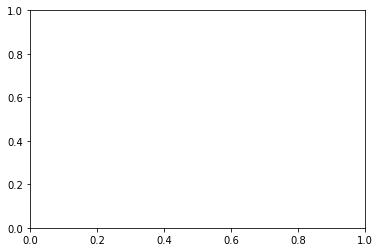

In [ ]:
fig, ax = plt.subplots()
plt.show()

Vamos a trabajar con el dataset de fútbol de las 5 ligas top de Europa que usamos en el [tutorial de Pandas](https://raw.githubusercontent.com/edalgoca/mod02_python/main/football_stats.csv):

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/edalgoca/mod02_python/main/football_stats.csv', index_col='player_name')

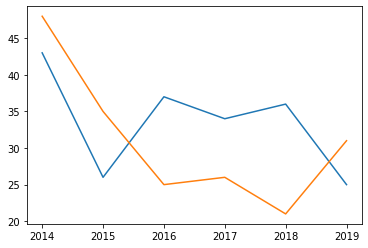

In [ ]:
# Filtrando datos del dataset entre 2014 y 2019
messi_goals = df.loc['Lionel Messi'].query('year != 2020')
ronaldo_goals = df.loc['Cristiano Ronaldo'].query('year != 2020')

# Plot -> ax.plot(X, Y)
fig, ax = plt.subplots()
ax.plot(messi_goals.year, messi_goals.goals)
ax.plot(ronaldo_goals.year, ronaldo_goals.goals)
# plt.savefig('1.jpg')
plt.show()

## Personalizar un plot

Hay una serie de argumentos que te permitirán personalizar cómo se ven los datos de tu plot tanto como te puedas imaginar:

- `marker='o'` → añade marcadores al plot y también puedes indicar el tipo de marcador que quieres. Aquí te dejo todas las [opciones de marcadores que hay](https://matplotlib.org/stable/api/markers_api.html).
- `linestyle='--'` → cambia el tipo de línea. Así mismo, aquí podrás encontrar los [distintos tipos de línea](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html). Incluso si colocas `'None'`, simplemente ya no habrá líneas y quedarán solo los marcadores.
- `color='b'` → cambia el color de tus datos. Aquí encontrarás [cómo poner cualquier color](https://matplotlib.org/stable/tutorials/colors/colors.html) e incluso dejarlos transparentes.
- `label='name'` → pone una etiqueta al plot (muy útil cuando vas a poner varias gráficas en un solo plot).

Adicionalmente, el objeto *Axes* trae una serie de métodos que podrías usar para que sea sencillo identificar de qué trata tu gráfica. Colócalos siempre antes de mostrar tu gráfica con `plt.show()`.

- `.set_xlabel('Name')` → coloca nombre al eje de las X.
- `.set_ylabel('Name')` → coloca nombre al eje de las Y.
- `.set_title('Name')` → coloca el título de tu plot.
- `.set(xlabel='Name')` → también puedes usar únicamente `set` y pasar como parámetros lo anterior.
- `.legend()` → si pusiste etiquetas, `legend` las mostrará.

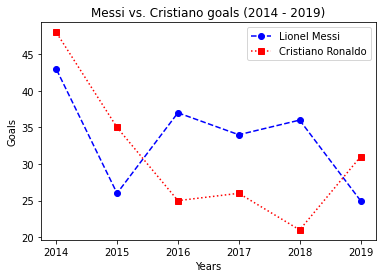

In [ ]:
fig, ax = plt.subplots()
ax.plot(messi_goals.year, messi_goals.goals,
        marker='o', color='b', linestyle='--', label='Lionel Messi')
ax.plot(ronaldo_goals.year, ronaldo_goals.goals,
        marker='s', color='r', linestyle='dotted', label='Cristiano Ronaldo')

ax.set(xlabel='Years', ylabel='Goals', title='Messi vs. Cristiano goals (2014 - 2019)')
ax.legend()
# plt.savefig('2.jpg')
plt.show()

## Subplots

In [ ]:
# Nuevo filtro
cavani_goals = df.loc['Edinson Cavani'].query('year != 2020')

❌ Incorrecto

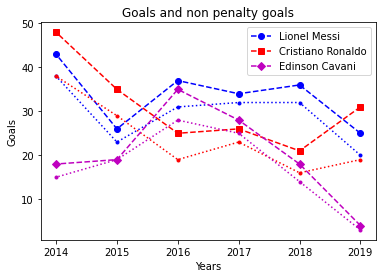

In [ ]:
fig, ax = plt.subplots()
ax.plot(messi_goals.year, messi_goals.goals,
        marker='o', color='b', linestyle='--', label='Lionel Messi')
ax.plot(messi_goals.year, messi_goals.npg,
        marker='.', color='b', linestyle='dotted')
ax.plot(ronaldo_goals.year, ronaldo_goals.goals,
        marker='s', color='r', linestyle='--', label='Cristiano Ronaldo')
ax.plot(ronaldo_goals.year, ronaldo_goals.npg,
        marker='.', color='r', linestyle='dotted')
ax.plot(cavani_goals.year, cavani_goals.goals,
        marker='D', color='m', linestyle='--', label='Edinson Cavani')
ax.plot(cavani_goals.year, cavani_goals.npg,
        marker='.', color='m', linestyle='dotted')

ax.set(xlabel='Years', ylabel='Goals', title='Goals and non penalty goals')
ax.legend()
# plt.savefig('3.jpg')
plt.show()

Añadiendo subplots

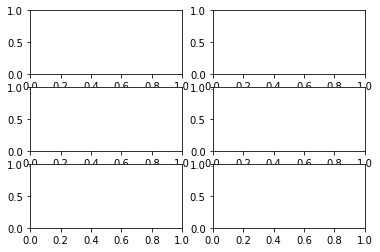

In [ ]:
fig, ax = plt.subplots(3, 2)
plt.savefig('4.jpg')
plt.show()

In [ ]:
ax.shape

(3, 2)

✅ Correcto

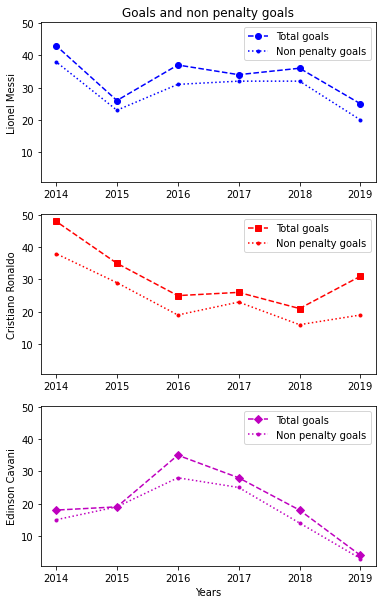

In [ ]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize=[6, 10])

ax[0].plot(messi_goals.year, messi_goals.goals,
        marker='o', color='b', linestyle='--', label='Total goals')
ax[0].plot(messi_goals.year, messi_goals.npg, marker='.',
        color='b', linestyle='dotted', label='Non penalty goals')
ax[1].plot(ronaldo_goals.year, ronaldo_goals.goals,
        marker='s', color='r', linestyle='--', label='Total goals')
ax[1].plot(ronaldo_goals.year, ronaldo_goals.npg, marker='.',
        color='r', linestyle='dotted', label='Non penalty goals')
ax[2].plot(cavani_goals.year, cavani_goals.goals,
        marker='D', color='m', linestyle='--', label='Total goals')
ax[2].plot(cavani_goals.year, cavani_goals.npg, marker='.',
        color='m', linestyle='dotted', label='Non penalty goals')

ax[2].set_xlabel('Years')
ax[0].set_ylabel('Lionel Messi')
ax[1].set_ylabel('Cristiano Ronaldo')
ax[2].set_ylabel('Edinson Cavani')
ax[0].set_title('Goals and non penalty goals')
ax[0].legend()
ax[1].legend()
ax[2].legend()
# plt.savefig('5.jpg')
plt.show()

## Gráficos de barras



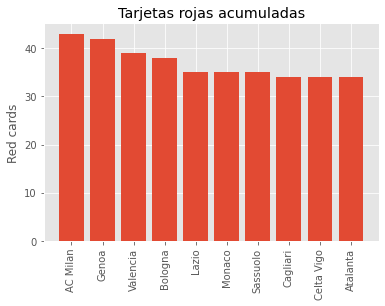

In [ ]:
# Datos de tarjetas rojas por equipo
top_red_cards = df.groupby('team_name')['red_cards'].sum() \
                .sort_values(ascending=False).head(10)

# Plot
# plt.figure(figsize=[6.4, 6])
plt.style.use('ggplot')
plt.bar(top_red_cards.index, top_red_cards)
plt.xticks(rotation=90)
plt.title('Tarjetas rojas acumuladas')
plt.ylabel('Red cards')
plt.show()

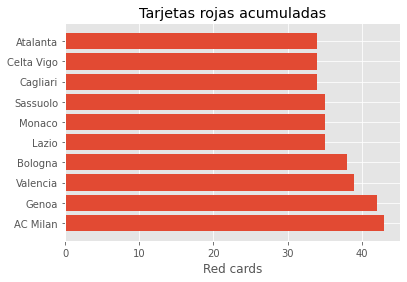

In [ ]:
plt.barh(top_red_cards.index, top_red_cards)
plt.title('Tarjetas rojas acumuladas')
plt.xlabel('Red cards')
plt.show()

### Gráfico de barras apilado

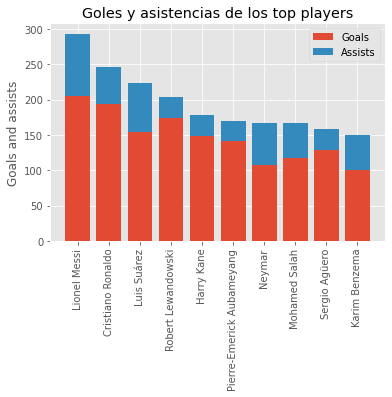

In [ ]:
# Filter
df['goals_assists'] = df.goals + df.assists
top_players = df.groupby('player_name')[['goals', 'assists', 'goals_assists']].sum() \
                .sort_values('goals_assists', ascending=False).head(10)

# Plot
plt.bar(top_players.index, top_players.goals, label='Goals')
plt.bar(top_players.index, top_players.assists, label='Assists', bottom=top_players.goals)
plt.xticks(rotation=90)
plt.title('Goles y asistencias de los top players')
plt.ylabel('Goals and assists')
plt.legend()
plt.show()

## Histograma

Para graficar un histograma se usa `plt.hist(X)` y como argumento se pasa la columna que quieras analizar. Además, puedes personalizar el gráfico con otros argumentos:

- `bins=n` → dice cuántas barras serán mostradas en el histograma. Por defecto vienen 10.
- A este argumento también le puedes pasar una lista para establecer un límite en el rango de las X en las que quieras que se muestren.
- Si quieres colocar 2 histogramas que se podrían sobreponer entre sí, se puede usar el argumento `alpha` que si le pasas un valor entre 0 y 1 cambia la transparencia del color.
- También puedes usar el argumento `histtype='step'` que hace que cambie la forma que se representa el histograma, por ejemplo líneas en vez de rectángulos sólidos. Aquí te dejo la documentación para ver qué otros tipos de `histtype` existen y también otros [argumentos de hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
- Por último, si usas `density=True`, el gráfico se trasformará a porcentajes para que el área total de los rectángulos sea de 1 (100%). Te recomiendo recordar este argumento porque podría ser muy útil más adelante para entender el peso de los valores más que su cantidad en sí misma.

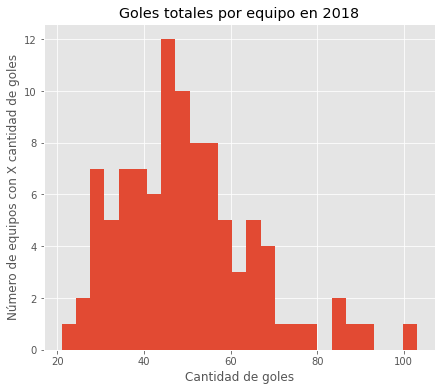

In [ ]:
# Goles totales por equipo en 2018
df_2018 = df.query('year == 2018')
team_goals_2018 = df_2018.groupby('team_name')['goals'].sum()

# Plot
plt.figure(figsize=[7, 6]) # 7 in de ancho y 6 in de alto
plt.hist(team_goals_2018, bins=25)
plt.title('Goles totales por equipo en 2018')
plt.xlabel('Cantidad de goles')
plt.ylabel('Número de equipos con X cantidad de goles')
plt.savefig('6.jpg')
plt.show()

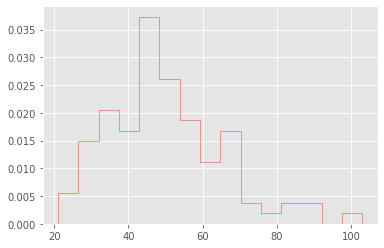

In [ ]:
# Goles totales por equipo en 2018
df_2018 = df.query('year == 2018')
team_goals_2018 = df_2018.groupby('team_name')['goals'].sum()
plt.hist(team_goals_2018, bins=15, histtype='step', density=True)
plt.show()

## Gráfico de dispersión o scatter plot

Se lo plotea con plt.scatter(x, y). Se le puede colocar varios argumentos que ya vimos para los gráficos anteriores, pero adicionalmente, hay un par muy útiles para pasar una tercera variable, por ejemplo, de tiempo. Con c=col podrás colorear cada punto con un degradado. Y con s=col podrás darles distintos tamaños a los puntos. Si quieres ver otros argumentos de este tipo de gráfico, acá te dejo la documentación oficial.

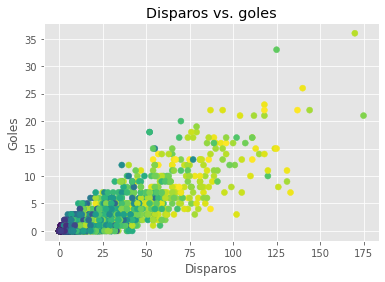

In [ ]:
plt.scatter(df_2018.shots, df_2018.goals, c=df_2018.games)
plt.title('Disparos vs. goles')
plt.xlabel('Disparos')
plt.ylabel('Goles')
plt.savefig('7.jpg')
plt.show()